<a href="https://colab.research.google.com/github/sooryakabir/MNIST_KNN/blob/main/MNIST_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test = pd.read_csv('/content/sample_data/mnist_test.csv')
# sub = pd.read_csv('/content/sample_submission.csv')

# print("Data are Ready!!")

In [3]:
header = ['label']

In [4]:
for i in range(1,785):
  header.append(i)

In [5]:
len(header)

785

In [6]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (19999, 785)
Testing data size is (9999, 785)


In [7]:
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.columns = header
test.columns = header

In [9]:
train.head()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Y = train["label"]
X = train.drop(labels = ["label"], axis = 1)

In [48]:
len(X)

19999

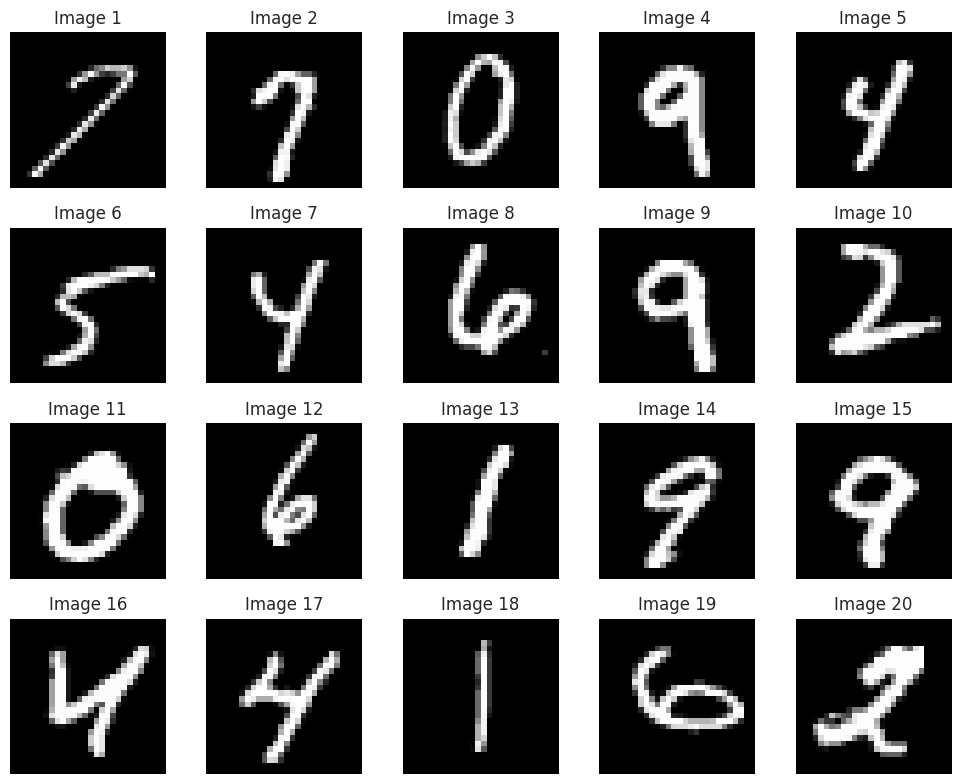

In [51]:
# Set the seed for reproducibility (optional)
np.random.seed(42)

# Choose 20 random numbers from 0 to 19999
random_numbers = np.random.choice(20000, 20, replace=False)

# Set up the figure for plotting
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each image
for i, index in enumerate(random_numbers):
    # Get the flattened image data for the current index
    flattened_image = X.iloc[index].values

    # Reshape the flattened image into a 28x28 matrix
    image = np.reshape(flattened_image, (28, 28))

    # Plot the image
    ax = axes.flat[i]
    ax.imshow(image, cmap='gray')
    ax.axis('off')  # Turn off axis
    ax.set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()



In [24]:
Y

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: label, Length: 19999, dtype: int64

In [25]:
# Normalize
X_train = X / 255.0
test = test / 255.0

In [26]:
# Convert label to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y, num_classes = 10)

In [27]:
# Split the train and the validation set for the fitting
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=2)

In [28]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15999, 784), (4000, 784), (15999, 10), (4000, 10))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_predict_knn = neigh.predict(X_test)

In [31]:
knn_accuracy = accuracy_score(Y_test, y_predict_knn)
knn_accuracy

0.955

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cnf = confusion_matrix(Y_test.argmax(axis=1), y_predict_knn.argmax(axis=1)) #labels=["0", "1", "2","3","4","5","6","7","8","9"]

In [54]:
cnf

array([[369,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  1, 458,   1,   0,   1,   0,   0,   1,   0,   0],
       [  8,   9, 365,   3,   0,   0,   0,   7,   1,   0],
       [  6,   2,   3, 376,   0,   8,   0,   1,   6,   2],
       [  3,   6,   1,   0, 362,   0,   0,   1,   0,  16],
       [  8,   2,   0,  10,   0, 333,   1,   0,   0,   4],
       [  4,   1,   0,   0,   0,   0, 407,   0,   0,   0],
       [  1,   4,   1,   0,   1,   0,   0, 414,   0,   3],
       [  9,   6,   0,   3,   1,   4,   2,   1, 352,   3],
       [  5,   0,   0,   6,   2,   0,   0,   7,   1, 385]])

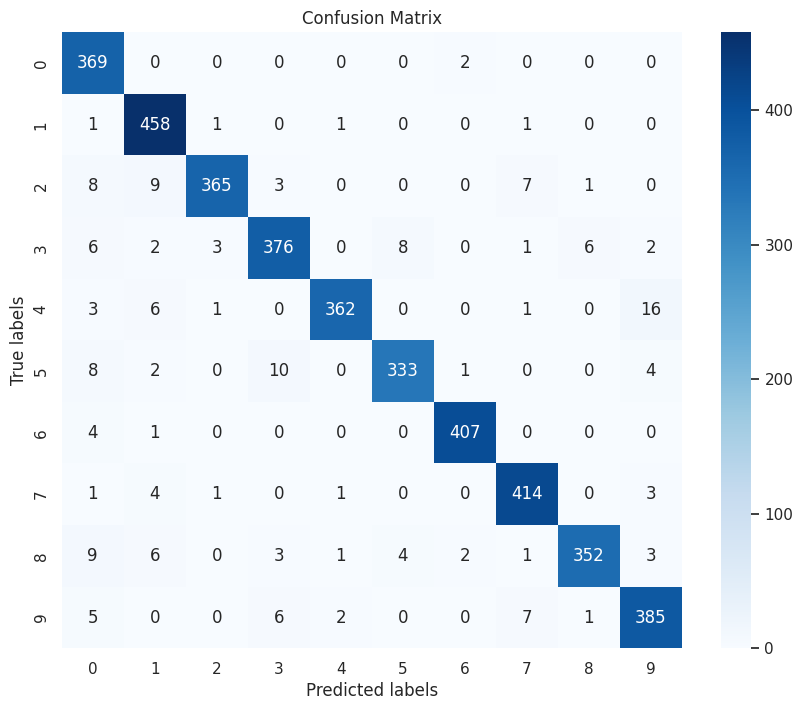

In [35]:
# Labels for confusion matrix
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cnf, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [58]:
from sklearn.metrics import classification_report

print(classification_report(Y_test.argmax(axis=1), y_predict_knn.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       371
           1       0.94      0.99      0.96       462
           2       0.98      0.93      0.96       393
           3       0.94      0.93      0.94       404
           4       0.99      0.93      0.96       389
           5       0.97      0.93      0.95       358
           6       0.99      0.99      0.99       412
           7       0.96      0.98      0.97       424
           8       0.98      0.92      0.95       381
           9       0.93      0.95      0.94       406

    accuracy                           0.96      4000
   macro avg       0.96      0.95      0.95      4000
weighted avg       0.96      0.96      0.96      4000

